<a href="https://colab.research.google.com/github/shreyakolluru/X-Twitter-Sentiment-Analysis/blob/main/tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Twitter_Data.csv to Twitter_Data (1).csv


In [4]:
import io

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Access the uploaded file using its actual key, 'Twitter_Data (1).csv'
data = pd.read_csv(io.BytesIO(uploaded['Twitter_Data (1).csv']))

In [5]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
data.shape

(162980, 2)

In [7]:
data.category.unique()

array([-1.,  0.,  1., nan])

In [8]:
data.isna().sum()

,0
clean_text,4
category,7


In [9]:
data[data['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [10]:
data[data['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [11]:
data.drop(data[data['clean_text'].isna()].index, inplace=True)
data.drop(data[data['category'].isna()].index, inplace=True)

In [12]:
sentiment_map={-1:'negative',1:'positive',0:'neutral'}
data.insert(2,'sentiment',[sentiment_map[s] for s in data.category],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]

data.head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


In [13]:
#labeling
reviews = np.array(data['clean_text'])[:]
labels = np.array(data['sentiment'])[:]

In [14]:
from collections import Counter

Counter(labels)

Counter({'negative': 35509, 'neutral': 55211, 'positive': 72249})

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv


def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
text_counts=cv.fit_transform(data['clean_text'].values.astype('U'))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)

In [17]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics

clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.7385203820744104

In [18]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.8550039884641345

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8335   927  1481]
 [  467 15195   947]
 [ 1375  1892 18272]]
Normalized confusion matrix
[[0.78 0.09 0.14]
 [0.03 0.91 0.06]
 [0.06 0.09 0.85]]


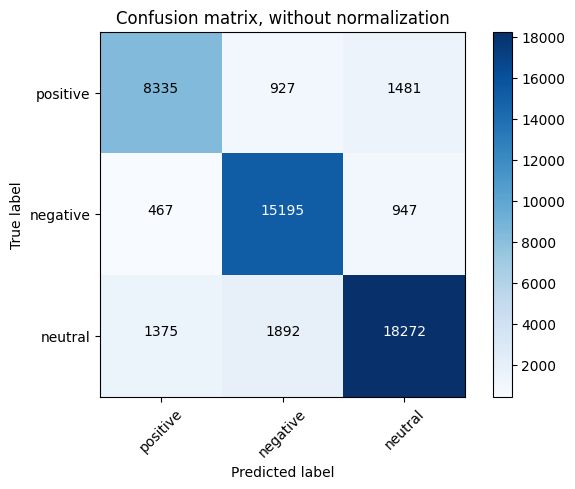

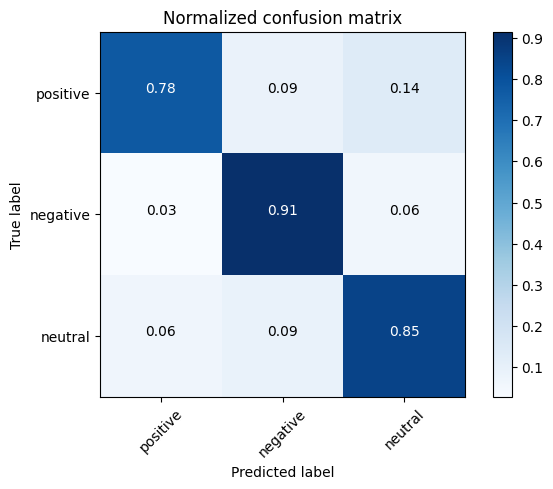

Confusion matrix, without normalization
[[ 8335   927  1481]
 [  467 15195   947]
 [ 1375  1892 18272]]
Normalized confusion matrix
[[0.78 0.09 0.14]
 [0.03 0.91 0.06]
 [0.06 0.09 0.85]]


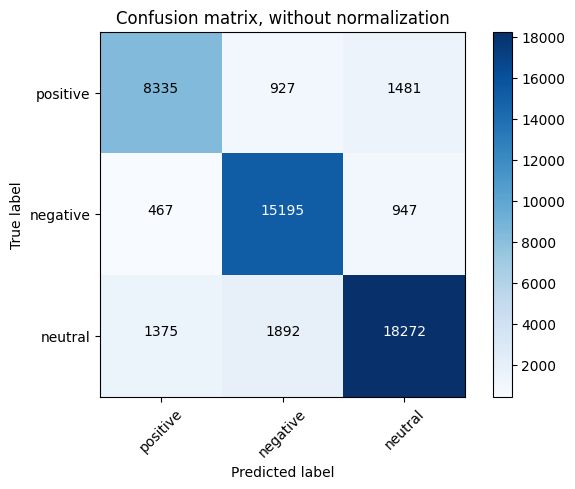

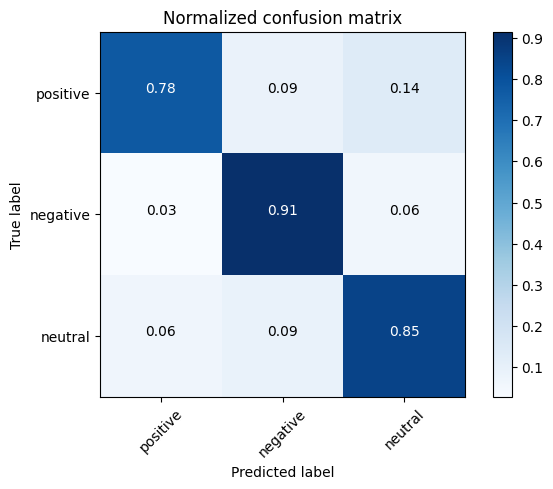

In [20]:
#linear
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
